In [4]:
import sys
sys.path.append('../')
from PIL import Image
import numpy as np
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt
from effdet.data.cap_multi_aug import *
from bboxVisualize import *
import json

In [2]:
img_path = 'path/to/images/'
ann_files = "path/to/annotations"
coco = COCO(ann_files+'val.json')
category_id_to_name = getCategoryIdToName(coco)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [5]:
result = json.load(open(r'path/to/result.json','r'))
len(result),result[0]

(674200,
 {'image_id': 1,
  'bbox': [195.8767547607422,
   16.074871063232422,
   149.73570251464844,
   244.74989318847656],
  'score': 0.99755859375,
  'category_id': 2})

In [6]:
len(coco.getImgIds()),coco.loadImgs([1])[0]

(841, {'file_name': 'SGP_Bing_080.png', 'height': 261, 'width': 640, 'id': 1})

In [7]:
imgid=768

{'file_name': 'SH_Bing_252.png', 'height': 373, 'width': 600, 'id': 768} {'bbox': array([[209., 465., 360., 580.],
       [178., 175., 243., 199.]]), 'cls': array([2, 2], dtype=int64)}


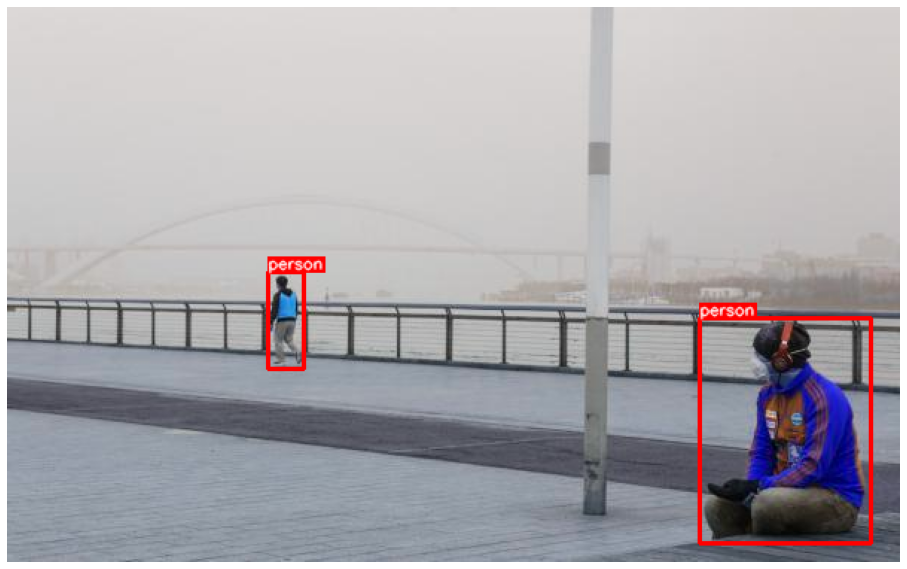

In [9]:
imginfo = coco.loadImgs([imgid])[0]
# annids = coco.getAnnIds(imgIds=[imgid])
# anninfos = coco.loadAnns(annids)
annotations = getAnnotFromImgIds(coco,[imginfo['id']],toYxyx=True)[0]
print(imginfo,annotations)
cvimg = cv2.imread(img_path+imginfo['file_name'])
visualizeFromAnnots(cvimg,annotations,category_id_to_name,toXywh=True)

In [10]:
dtres = []
for res in result:
    if res['image_id']==imgid:
        dtres.append(res)
len(dtres)

1000

2


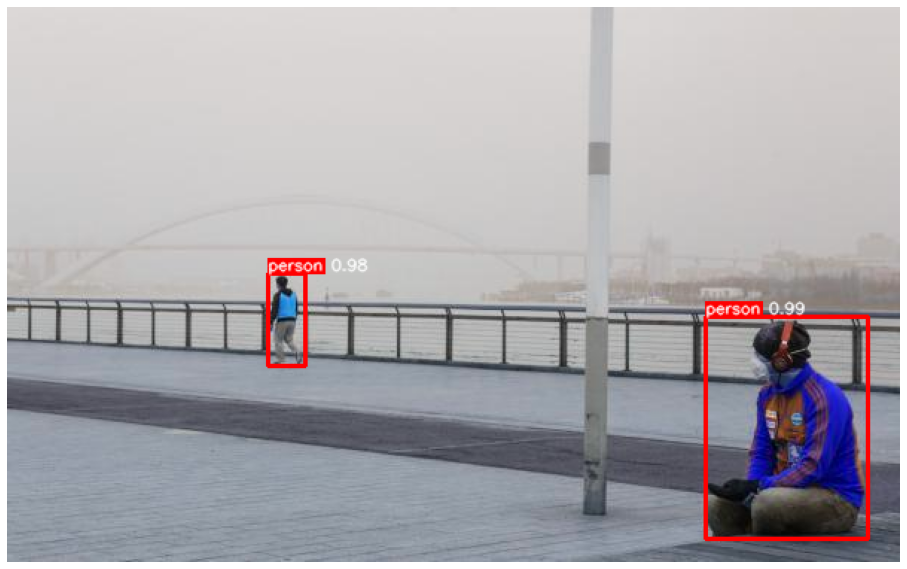

In [12]:
annots_res = {'bbox':[],'cls':[],'score':[]}
for i in range(min(1000,len(dtres))):
    if dtres[i]['score']>0.5:
        annots_res['bbox'].append(dtres[i]['bbox'])
        annots_res['cls'].append(dtres[i]['category_id'])
        annots_res['score'].append(dtres[i]['score'])
print(len(annots_res['cls']))
annots_res['bbox']=np.array(annots_res['bbox'])
annots_res['cls']=np.array(annots_res['cls'])
annots_res['score']=np.array(annots_res['score'])
visualizeFromAnnots(cvimg,annots_res,category_id_to_name,toXywh=False,withScore=True)